#### Logistic Regression

In [1]:
# import my libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated().sum()

0

In [6]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
TC = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
TC.isna().sum()

11

In [9]:
df['TotalCharges']= TC.fillna(0)

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
# Descriptive Statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


<Axes: xlabel='Churn'>

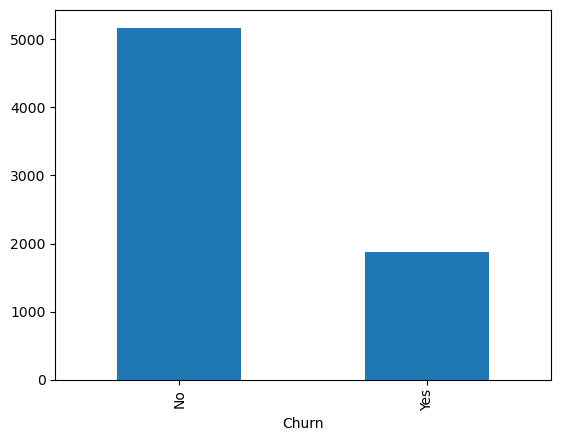

In [12]:
# Target column
df.Churn.value_counts().plot(kind='bar')

In [13]:
# to balance my Target column we can use over and under sampling or smote

In [14]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# convert text to unmber
df.Churn = (df.Churn =='Yes').astype(int)

In [16]:
df.Churn.unique()

array([0, 1])

In [17]:
# Data preparation
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
x = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# splitting into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Data preprocessing, split into cat and num cols
num_cols = x.select_dtypes(include=np.number).columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()

In [22]:
# Encoding the cat_cols
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(sparse_output = False).fit(df[cat_cols])

# Checking the encoded cols
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [23]:
# fit it on the train and text cat cols
x_train[encoded_cols] = encoder.transform(x_train[cat_cols])
x_test[encoded_cols] = encoder.transform(x_test[cat_cols])

In [24]:
# Scaling for num_cols
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])
x_train = x_train[num_cols + encoded_cols]
x_test = x_test[num_cols + encoded_cols]

In [25]:
# training the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [27]:
data = pd.DataFrame()
data['Actual'] = y_train
data['Prediction'] = train_pred

data['correct'] = data['Actual'] == data['Prediction']

In [28]:
data.correct.value_counts()

correct
True     4539
False    1095
Name: count, dtype: int64

In [29]:
# model evaluation in classification metrics
# Accuracy score
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(train_pred, y_train)
test_acc = accuracy_score(test_pred, y_test)
train_acc, test_acc

(0.8056443024494143, 0.8055358410220014)

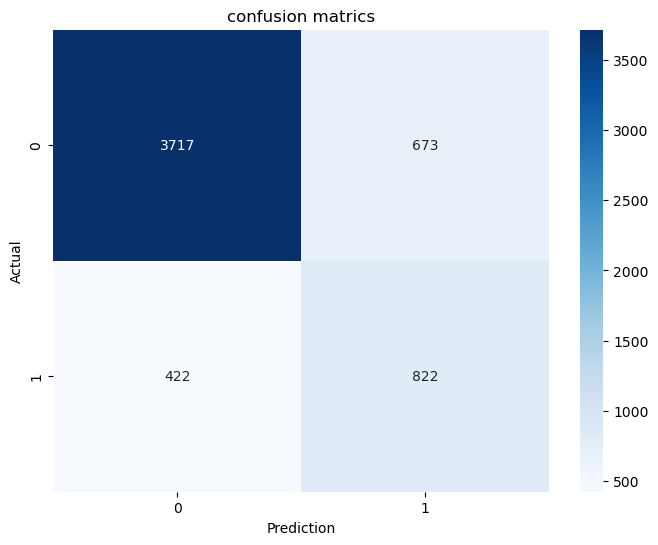

In [30]:
# confusion matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_pred, y_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('confusion matrics')
plt.show(block=True)

In [31]:
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [32]:
unique, counts = np.unique(train_pred, return_counts=True)
dict(zip(unique, counts))

{0: 4390, 1: 1244}

#### Improving the model

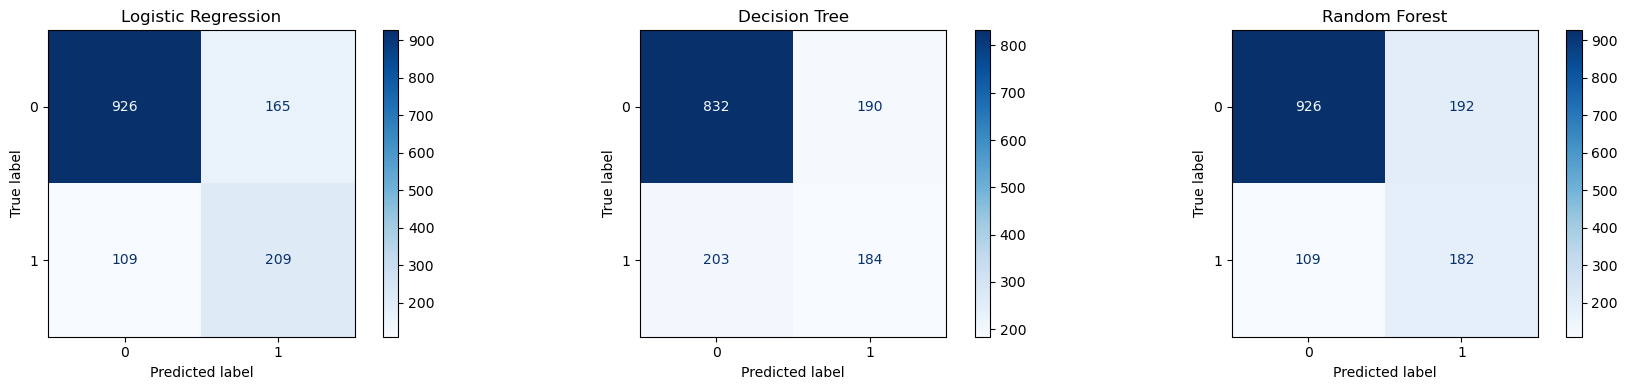


Classification Metrics
                 Logistic Regression  Decision Tree  Random Forest
Train Acurracy                   1.0            1.0            1.0
Test Acurracy                    1.0            1.0            1.0
Precision score                  1.0            0.0            0.0
Recall Score                     1.0            0.0            1.0


In [33]:
# use several models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                            classification_report, precision_score, recall_score, f1_score)
models = {
    'Logistic Regression': LogisticRegression(), 
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# using for loop to evaluate our model
Results = {}
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    # training the model
    model.fit(x_train, y_train)

    # Predict the training and test 
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # evaluate the prediction
    train_score = accuracy_score(train_pred, y_train)
    test_score = accuracy_score(test_pred, y_test)

    # checking the for precision
    precision = precision_score(test_pred, y_test)

    # checking the recall
    recall = recall_score(test_pred, y_test)

    # store the results
    Results[name] = {
        'Train Acurracy': train_score,
        'Test Acurracy': test_score,
        'Precision score': precision,
        'Recall Score': recall
    }

    # plot confusion matrix
    cm = confusion_matrix(test_pred, y_test)
    display = ConfusionMatrixDisplay(cm)
    display.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(Results)
print(metrics_df.round())

In [34]:
pd.DataFrame(Results).T

,Train Acurracy,Test Acurracy,Precision score,Recall Score
Logistic Regression,0.805644,0.805536,0.558824,0.657233
Decision Tree,0.998048,0.721079,0.491979,0.475452
Random Forest,0.998048,0.786373,0.486631,0.625430


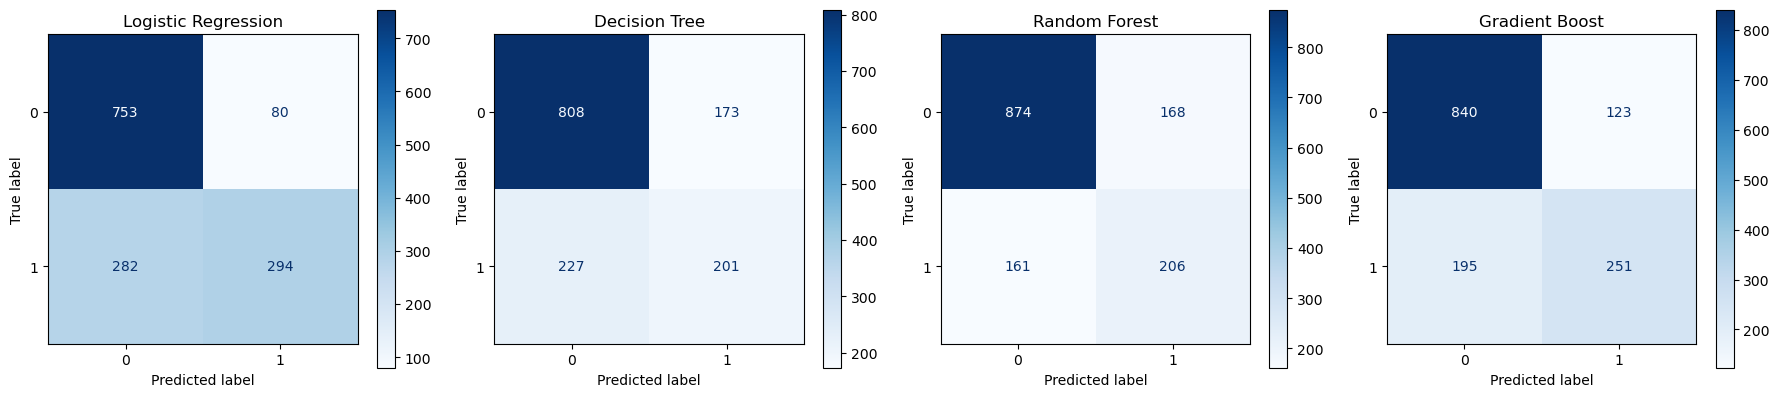


Classification Metrics


,Logistic Regression,Decision Tree,Random Forest,Gradient Boost
Train Acurracy,0.783,0.999,0.999,0.862
Test Acurracy,0.743,0.716,0.767,0.774
Precision score,0.786,0.537,0.551,0.671
Recall Score,0.510,0.470,0.561,0.563


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
# Balancing the target column
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
models = {
    'Logistic Regression': LogisticRegression(), 
    'Decision Tree': DecisionTreeClassifier(random_state=2),
    'Random Forest': RandomForestClassifier(random_state=2),
    'Gradient Boost': GradientBoostingClassifier(random_state=2)
}

# using for loop to evaluate our model
Result = {}
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    # training the model
    model.fit(x_train_resampled, y_train_resampled)

    # Predict the training and test 
    train_pred = model.predict(x_train_resampled)
    test_pred = model.predict(x_test)

    # evaluate the prediction
    train_score = accuracy_score(train_pred, y_train_resampled)
    test_score = accuracy_score(test_pred, y_test)

    # checking the for precision
    precision = precision_score(test_pred, y_test)

    # checking the recall
    recall = recall_score(test_pred, y_test)

    # store the results
    Result[name] = {
        'Train Acurracy': train_score,
        'Test Acurracy': test_score,
        'Precision score': precision,
        'Recall Score': recall
    }

    # plot confusion matrix
    cm = confusion_matrix(test_pred, y_test)
    display = ConfusionMatrixDisplay(cm)
    display.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(Result)
metrics_df.round(3)

In [40]:
pd.DataFrame(Result).T

,Train Acurracy,Test Acurracy,Precision score,Recall Score
Logistic Regression,0.783039,0.743080,0.786096,0.510417
Decision Tree,0.998671,0.716111,0.537433,0.469626
Random Forest,0.998671,0.766501,0.550802,0.561308
Gradient Boost,0.861802,0.774308,0.671123,0.562780
